In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Exploratory Data Analysis

### 1. Import Dataset updated: Adjust details

In [2]:
sae=pd.read_csv('../data/sae_dataset_updated.csv')
sae.head()

,VehicleMarketCode,VehicleNationalCode,VehicleSegmentationGlobal,VehicleModelIntlName,Bodytype_Group,Fuel_Group,Transmission_Group,Drivetype_Group,VehicleKW,VehicleDoors,...,registration_date,Mileage,Price,oricpric,PriceChangeCount,AgeOfVeh,LossVal,DevPerKm,DevPerAge,KmPerAge
0,ES,29263,Small LCV,Combo,Panel van,Diesel,Manual,2WD,73,4.0,...,2008-07-01,238000,2990,2990.0,NaN,4234.0,16331,0.068618,3.857109,56.211620
1,ES,29263,Small LCV,Combo,Panel van,Diesel,Manual,2WD,73,4.0,...,2010-06-15,90000,4499,4499.0,NaN,3520.0,14822,0.164689,4.210795,25.568182
2,ES,29263,Small LCV,Combo,Panel van,Diesel,Manual,2WD,73,4.0,...,2005-07-01,210000,2490,2700.0,1.0,5330.0,16831,0.080148,3.157786,39.399625
3,ES,30020,E,607,Sedan,Diesel,Automated,2WD,150,4.0,...,2009-10-15,259000,6500,6500.0,NaN,4745.0,47750,0.184363,10.063224,54.583772
4,ES,30020,E,607,Sedan,Diesel,Automated,2WD,150,4.0,...,2006-07-01,155000,4900,7500.0,1.0,4965.0,49350,0.318387,9.939577,31.218530


In [3]:
sae.shape

(192880, 29)

Some adjustments to the dataset before starting the analysis

In [4]:
sae['VehicleNationalCode']=sae['VehicleNationalCode'].astype('str')
sae['VehicleGrossNewPrice']=sae['VehicleGrossNewPrice'].astype('int')
sae['registration_date']=pd.to_datetime(sae['registration_date'], format='%Y-%m-%d')
sae['SAEReporteddate']=pd.to_datetime(sae['SAEReporteddate'], format='%Y-%m-%d')
sae['VehicleProductionStart']=pd.to_datetime(sae['VehicleProductionStart'], format='%Y-%m-%d')
sae['VehicleProductionEnd']=pd.to_datetime(sae['VehicleProductionEnd'], format='%Y-%m-%d', errors='coerce')
sae2020=sae[sae.SAEReporteddate=='2020-02-03']
sae2022=sae[sae.SAEReporteddate=='2022-10-12']

In [5]:
sae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192880 entries, 0 to 192879
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   VehicleMarketCode          192880 non-null  object        
 1   VehicleNationalCode        192880 non-null  object        
 2   VehicleSegmentationGlobal  192880 non-null  object        
 3   VehicleModelIntlName       192880 non-null  object        
 4   Bodytype_Group             192880 non-null  object        
 5   Fuel_Group                 192880 non-null  object        
 6   Transmission_Group         192880 non-null  object        
 7   Drivetype_Group            192880 non-null  object        
 8   VehicleKW                  192880 non-null  int64         
 9   VehicleDoors               192859 non-null  float64       
 10  VehicleWheelBase           192834 non-null  float64       
 11  VehicleSeats               192880 non-null  int64   

##### Round decimal values to 2 digits

In [6]:
sae.round(2).head()

,VehicleMarketCode,VehicleNationalCode,VehicleSegmentationGlobal,VehicleModelIntlName,Bodytype_Group,Fuel_Group,Transmission_Group,Drivetype_Group,VehicleKW,VehicleDoors,...,registration_date,Mileage,Price,oricpric,PriceChangeCount,AgeOfVeh,LossVal,DevPerKm,DevPerAge,KmPerAge
0,ES,29263,Small LCV,Combo,Panel van,Diesel,Manual,2WD,73,4.0,...,2008-07-01,238000,2990,2990.0,NaN,4234.0,16331,0.07,3.86,56.21
1,ES,29263,Small LCV,Combo,Panel van,Diesel,Manual,2WD,73,4.0,...,2010-06-15,90000,4499,4499.0,NaN,3520.0,14822,0.16,4.21,25.57
2,ES,29263,Small LCV,Combo,Panel van,Diesel,Manual,2WD,73,4.0,...,2005-07-01,210000,2490,2700.0,1.0,5330.0,16831,0.08,3.16,39.40
3,ES,30020,E,607,Sedan,Diesel,Automated,2WD,150,4.0,...,2009-10-15,259000,6500,6500.0,NaN,4745.0,47750,0.18,10.06,54.58
4,ES,30020,E,607,Sedan,Diesel,Automated,2WD,150,4.0,...,2006-07-01,155000,4900,7500.0,1.0,4965.0,49350,0.32,9.94,31.22


#### Overview descriptive stats for all columns

In [7]:
sae.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
VehicleMarketCode,192880,2,ES,176407,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VehicleNationalCode,192880,15867,74488,852,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VehicleSegmentationGlobal,192880,29,C,42373,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VehicleModelIntlName,192880,752,Qashqai,5887,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bodytype_Group,192880,15,Hatchback,70058,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel_Group,192880,7,Diesel,114013,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission_Group,192880,2,Manual,143238,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Drivetype_Group,192880,2,2WD,172327,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VehicleKW,192880.0,NaN,NaN,NaN,NaT,NaT,98.682186,47.152377,4.0,73.0,88.0,110.0,586.0
VehicleDoors,192859.0,NaN,NaN,NaN,NaT,NaT,4.707465,0.696083,2.0,5.0,5.0,5.0,6.0


### 2. Correlation between fields (numerical data)

#### 2.1 Heatmap visualization
The best way to explore all numeric fields without investigating them individually is to create a heatmap. I can use it to visualize the pairwise correlations between each two variables

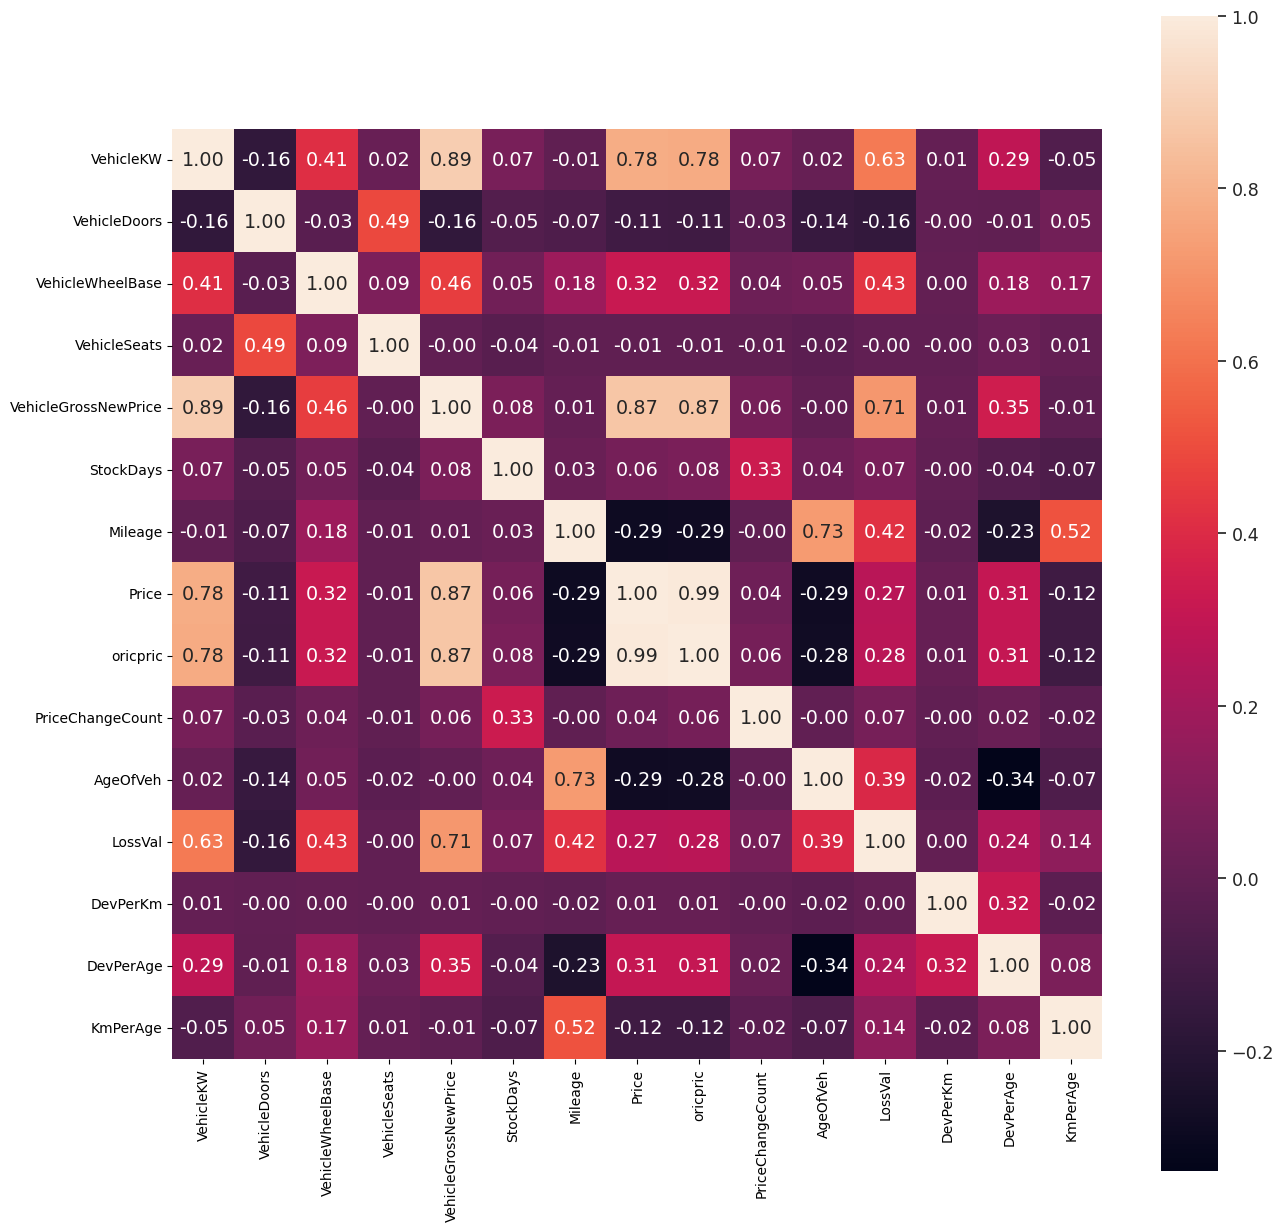

In [8]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1)

sns.set(font_scale = 1.15)
sns.heatmap(sae.corr(),
           cbar=True,
           annot=True,
           square=True,
           fmt='.2f',
           ax=ax);

Taking a look at the heatmap I can more easily visualize the strength of the relationship between two variables.

* Positive correlation occurs when two variables move in the same direction; as one increases, so do the other.

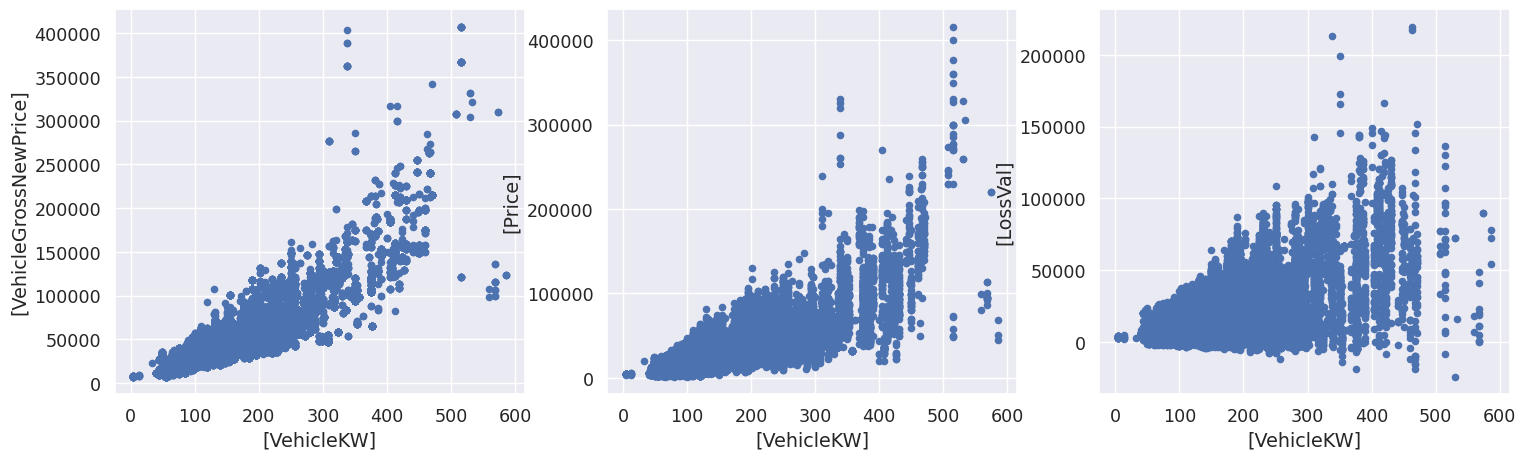

In [9]:
fig, axes = plt.subplots(1,3, figsize=(18,5))

sae.plot(x=['VehicleKW'], y=['VehicleGrossNewPrice'], kind='scatter', ax=axes[0])
sae.plot(x=['VehicleKW'], y=['Price'], kind='scatter', ax=axes[1])
sae.plot(x=['VehicleKW'], y=['LossVal'], kind='scatter', ax=axes[2])

* Negative correlation occurs when two variables move in opposite directions; as one increases, the other decreases.

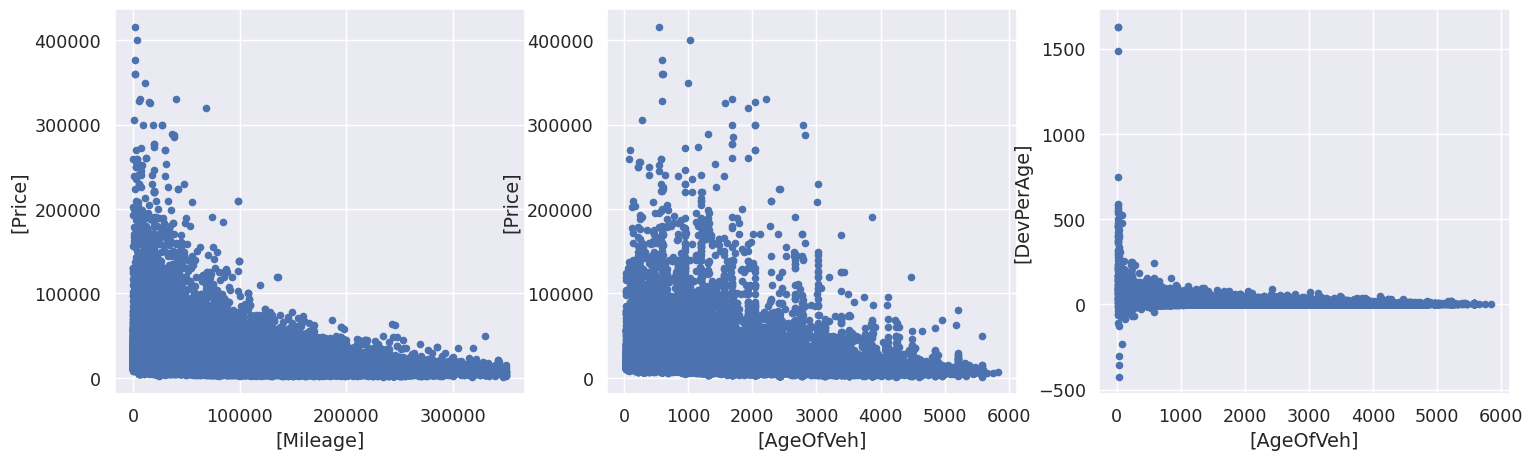

In [10]:
fig, axes = plt.subplots(1,3, figsize=(18,5))

sae.plot(x=['Mileage'], y=['Price'], kind='scatter', ax=axes[0])
sae.plot(x=['AgeOfVeh'], y=['Price'], kind='scatter', ax=axes[1])
sae.plot(x=['AgeOfVeh'], y=['DevPerAge'], kind='scatter', ax=axes[2])

Then, If I based the analysis on testing cause-effect hypotheses, I could perfectly calculate the trend between the most extreme variables on the scale.

* It's clear that if the power of the vehicle is higher, the Gross New price and the sale price will also be higher, as well as its devaluation.
* It's also evident with a higher Mileage and registration time, the price and devaluation per time will be lower.

#### 2.2 Outliers

I want to show those records with extreme values, outside the interquartile range. These records are usually eliminated because they could shift the mean in a fictitious way. But, since it's a Dataset with vehicles currently for sale, my intention is only to show that they exist and how I've explored them.

When a dataset has outliers, variability is often summarized by Interquantile Range (IQR) that it is a measure of statistical dispersion.
If add 1.5 x IQR, any number greater than this is a suspected outlier

In [11]:
stats=sae.describe().T

stats['IQR']=stats['75%']-stats['25%']

stats['IQR1.5']=1.5 * stats['IQR']+stats['75%']

In [12]:
stats.sort_values('IQR', ascending=False).head()

,count,mean,std,min,25%,50%,75%,max,IQR,IQR1.5
Mileage,192880.0,76988.615009,57069.621542,1.0,27780.75,69000.0,113727.75,350000.0,85947.00,242648.250
VehicleGrossNewPrice,192880.0,30259.096283,18962.733322,7140.0,20450.00,25850.0,33390.00,407250.0,12940.00,52800.000
oricpric,192684.0,18671.701423,14114.448980,-1.0,11100.00,15500.0,21500.00,415900.0,10400.00,37100.000
Price,192880.0,18394.630418,13789.559508,1390.0,10990.00,15400.0,21028.00,415900.0,10038.00,36085.000
LossVal,192880.0,11864.465865,9829.591844,-24251.0,6160.00,9605.0,14685.25,219610.0,8525.25,27473.125


The best way to display the data distribution is through box plot

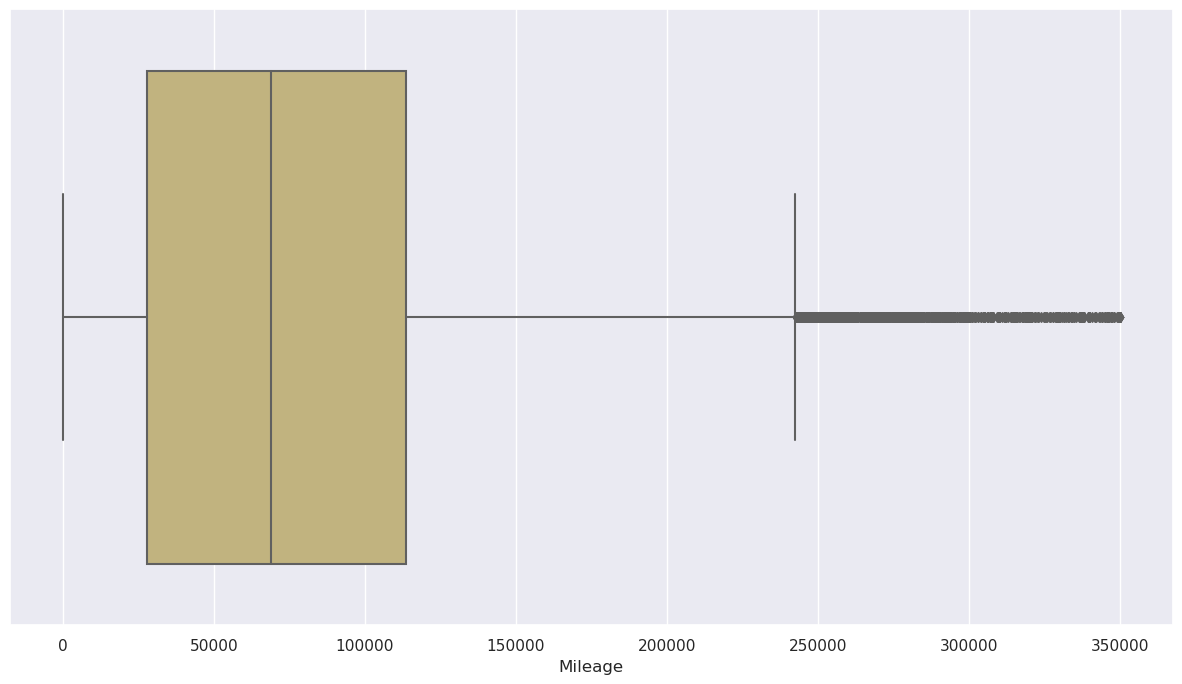

In [13]:
sns.set(rc={'figure.figsize':(15,8)})
sns.boxplot(x=sae.Mileage, color='y')

In [14]:
sae[sae.Mileage==max(sae.Mileage)].head()

,VehicleMarketCode,VehicleNationalCode,VehicleSegmentationGlobal,VehicleModelIntlName,Bodytype_Group,Fuel_Group,Transmission_Group,Drivetype_Group,VehicleKW,VehicleDoors,...,registration_date,Mileage,Price,oricpric,PriceChangeCount,AgeOfVeh,LossVal,DevPerKm,DevPerAge,KmPerAge
4646,ES,42532,Pure Pickup,Hilux,Pick up double cabin,Diesel,Manual,4WD,126,4.0,...,2010-07-01,350000,14950,16950.0,4.0,4486.0,16300,0.046571,3.633527,78.020508
5849,ES,43597,D,Exeo ST,Stationwagon,Diesel,Manual,2WD,105,5.0,...,2010-07-01,350000,2490,2499.0,2.0,3504.0,27570,0.078771,7.868151,99.885845
8857,ES,46017,E,5 Series,Sedan,Diesel,Manual,2WD,135,4.0,...,2010-10-15,350000,11500,11500.0,NaN,4380.0,31400,0.089714,7.168950,79.908676
20387,ES,50850,D MPV,Alhambra,MPV,Diesel,Manual,2WD,85,5.0,...,2013-07-01,350000,7499,7499.0,NaN,2408.0,25771,0.073631,10.702243,145.348837
31860,ES,55570,C,i30,Hatchback,Diesel,Manual,2WD,81,5.0,...,2014-07-01,350000,3900,4900.0,1.0,3025.0,16090,0.045971,5.319008,115.702479


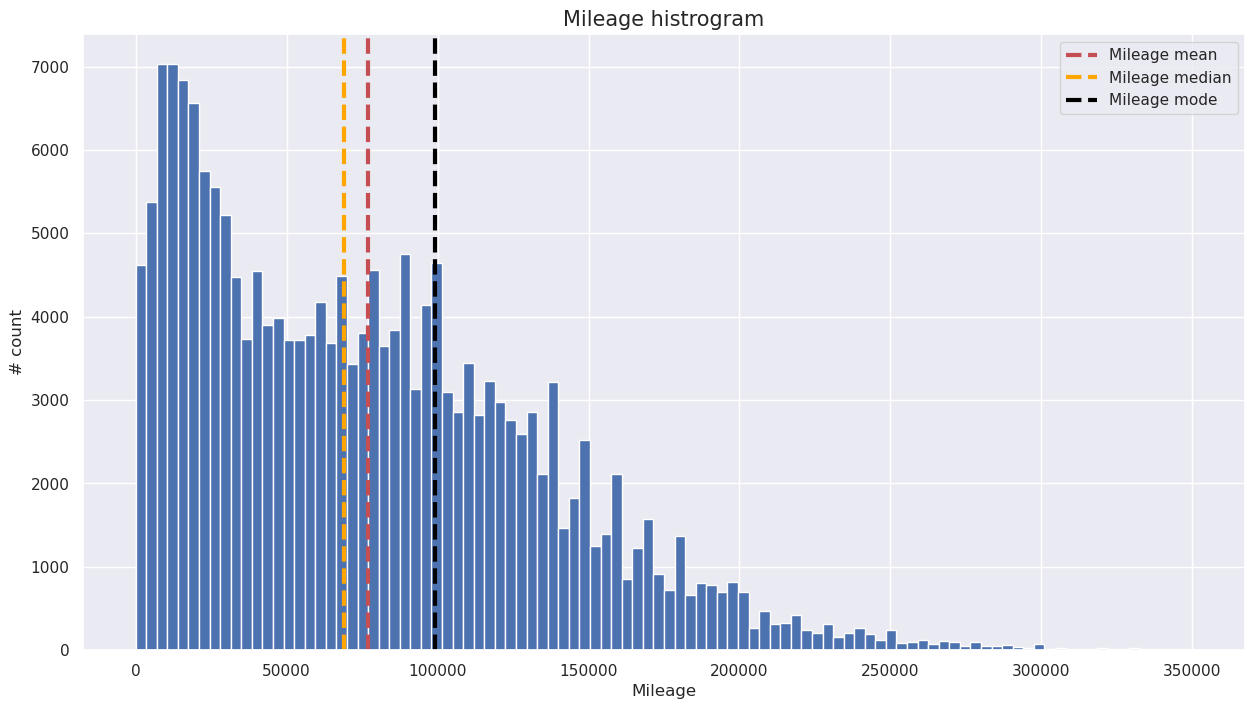

In [15]:
plt.figure(figsize=(15,8))
plt.hist(sae.Mileage, bins=100)

plt.axvline(sae.Mileage.mean(),
           c='r',
           linewidth=3.,
           linestyle='--',
           label='Mileage mean')

plt.axvline(sae.Mileage.median(),
           c='orange',
           linewidth=3.,
           linestyle='--',
           label='Mileage median')

plt.axvline(sae.Mileage.mode()[0],
           c='black',
           linewidth=3.,
           linestyle='--',
           label='Mileage mode')

plt.title('Mileage histrogram', size=15)
plt.xlabel('Mileage')
plt.ylabel('# count')
plt.legend()
plt.show();

### EDA Completed

I conclude the analysis of those variables that I've considered most important in the dataset. I'll try to build a linear regression model in other Jupyter Notebook and show something else in Tableau.

Thanks in advance for your attention!

### Trial TEST: Deleting Outliers in Dataset

A single Outlier is enough to greatly influence the mean of the dataset. I will check what would happen in dataset if I removed the outliers

In [16]:
outliers=pd.DataFrame(columns=stats.index)

outliers.shape

(0, 15)

In [17]:
sae.shape

(192880, 29)

In [18]:
for c in stats.index:
    iqr=stats.at[c, 'IQR']
    cutoff=1.5*iqr #test of Tukey
    
    lower=stats.at[c, '25%']-cutoff
    upper=stats.at[c, '75%']+cutoff
    
    res=sae[(sae[c]<lower)|(sae[c]>upper)].copy()
    res['outliers']=c
    outliers=outliers.append(res, sort=True)
    
outliers['outliers'].value_counts()

VehicleDoors            34956
VehicleSeats            28614
DevPerKm                21167
DevPerAge               16499
VehicleWheelBase        15163
VehicleGrossNewPrice    13670
VehicleKW               12862
Price                   12375
oricpric                12022
LossVal                  9314
StockDays                8383
PriceChangeCount         7673
KmPerAge                 5787
AgeOfVeh                 5375
Mileage                  1805
Name: outliers, dtype: int64

In [19]:
def get_outliers(stats: pd.DataFrame, threshold: float=1.5) -> pd.DataFrame:
    outliers=pd.DataFrame(columns=stats.index)
    
    for c in stats.index:
        iqr=stats.at[c, 'IQR']
        cutoff=1.5*iqr #test of Tukey
        
        lower=stats.at[c, '25%']-cutoff
        upper=stats.at[c, '75%']+cutoff
        
        res=sae[(sae[c]<lower)|(sae[c]>upper)].copy()
        res['outliers']=c
        outliers=outliers.append(res, sort=True)
        
    return outliers

In [20]:
outliers.head()

,AgeOfVeh,Bodytype_Group,DevPerAge,DevPerKm,Drivetype_Group,Fuel_Group,KmPerAge,LossVal,Mileage,PostCode,...,VehicleModelIntlName,VehicleNationalCode,VehicleProductionEnd,VehicleProductionStart,VehicleSeats,VehicleSegmentationGlobal,VehicleWheelBase,oricpric,outliers,registration_date
682,4433.0,Coupe,8.443492,0.337207,4WD,Petrol,25.039477,37430,111000,33400,...,A5,36963,2011-09-01,2007-04-01,4,D,2751.0,13900.0,VehicleKW,2007-12-15
683,5582.0,Coupe,7.601218,0.174366,4WD,Petrol,43.593515,42430,243339,12006,...,A5,36963,2011-09-01,2007-04-01,4,D,2751.0,10500.0,VehicleKW,2007-07-01
684,4234.0,Coupe,10.162966,0.195591,4WD,Petrol,51.960321,43030,220000,4745,...,A5,36963,2011-09-01,2007-04-01,4,D,2751.0,11900.0,VehicleKW,2008-07-01
685,4600.0,Coupe,8.789130,0.212789,4WD,Petrol,41.304348,40430,190000,46250,...,A5,36963,2011-09-01,2007-04-01,4,D,2751.0,12500.0,VehicleKW,2007-07-01
686,5415.0,Coupe,7.706371,0.217344,4WD,Petrol,35.457064,41730,192000,18151,...,A5,36963,2011-09-01,2007-04-01,4,D,2751.0,13000.0,VehicleKW,2007-12-15


In [21]:
clean_index=[i for i in sae.index if i not in outliers.index]

len(clean_index)

104880

In [22]:
sae=sae.iloc[clean_index]
sae.shape

(104880, 29)

In [23]:
len(outliers.index.unique())

88000

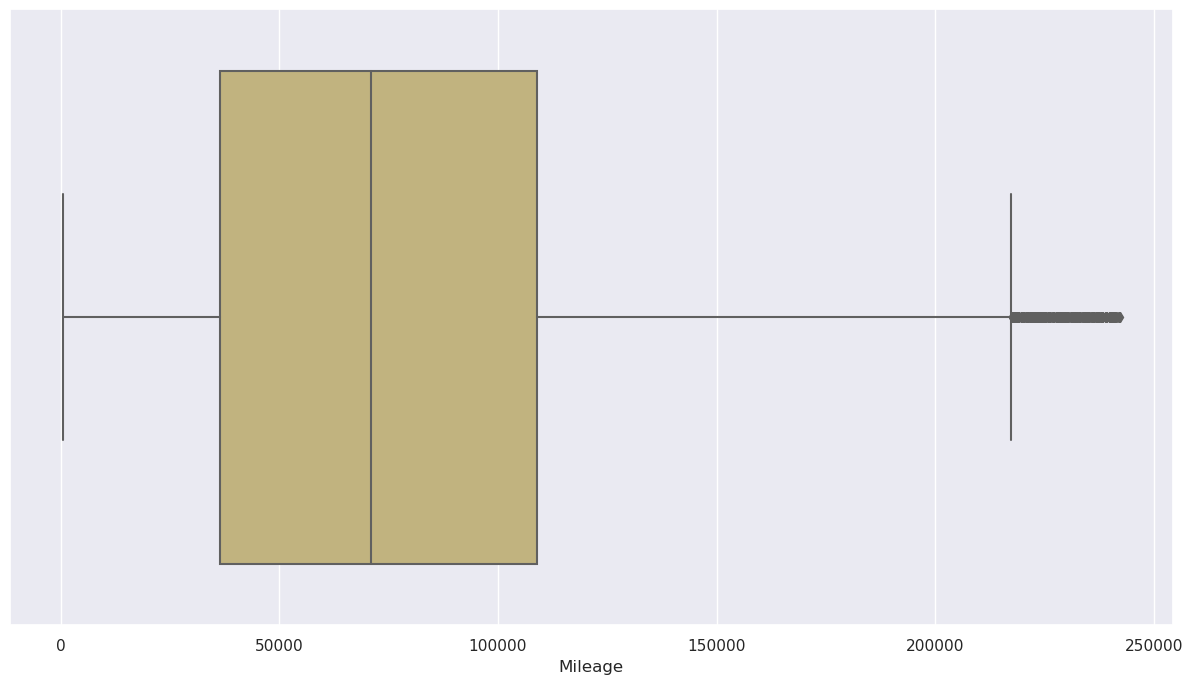

In [24]:
sns.set(rc={'figure.figsize':(15,8)})
sns.boxplot(x=sae.Mileage, color='y')

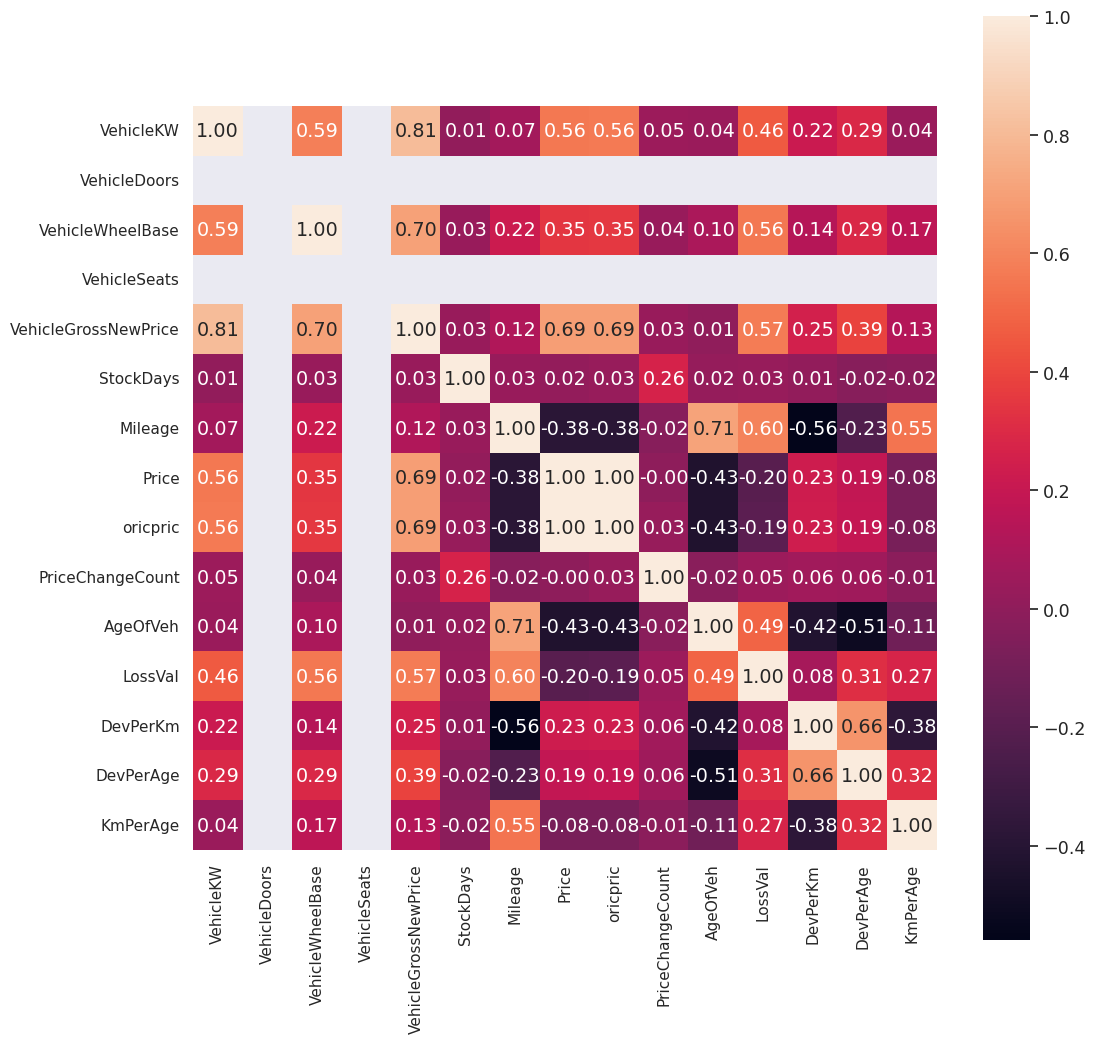

In [25]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)

sns.set(font_scale = 1.15)
sns.heatmap(sae.corr(),
           cbar=True,
           annot=True,
           square=True,
           fmt='.2f',
           ax=ax);

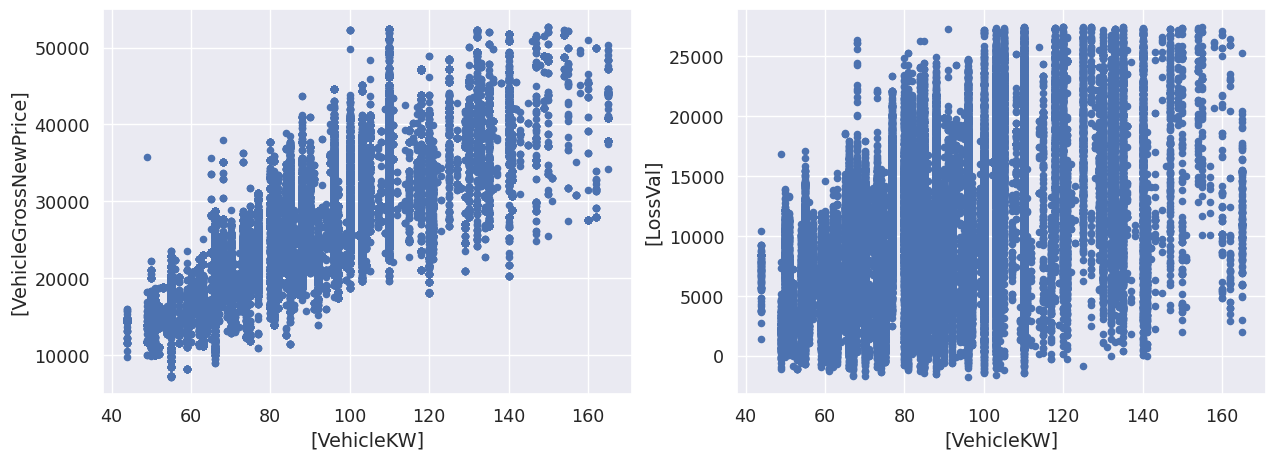

In [26]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sae.plot(x=['VehicleKW'], y=['VehicleGrossNewPrice'], kind='scatter', ax=axes[0])
sae.plot(x=['VehicleKW'], y=['LossVal'], kind='scatter', ax=axes[1])

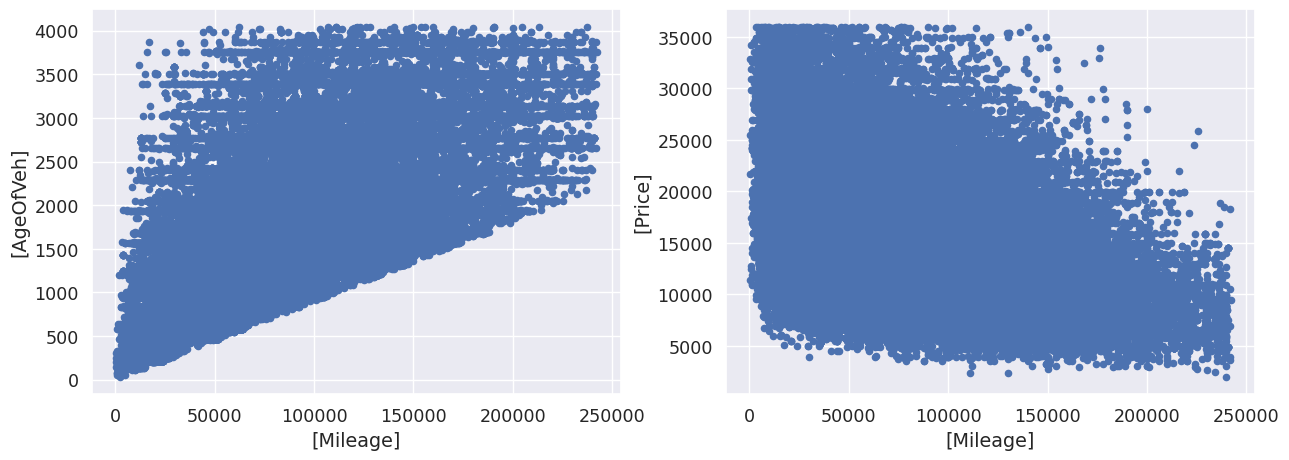

In [27]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sae.plot(x=['Mileage'], y=['AgeOfVeh'], kind='scatter', ax=axes[0])
sae.plot(x=['Mileage'], y=['Price'], kind='scatter', ax=axes[1])

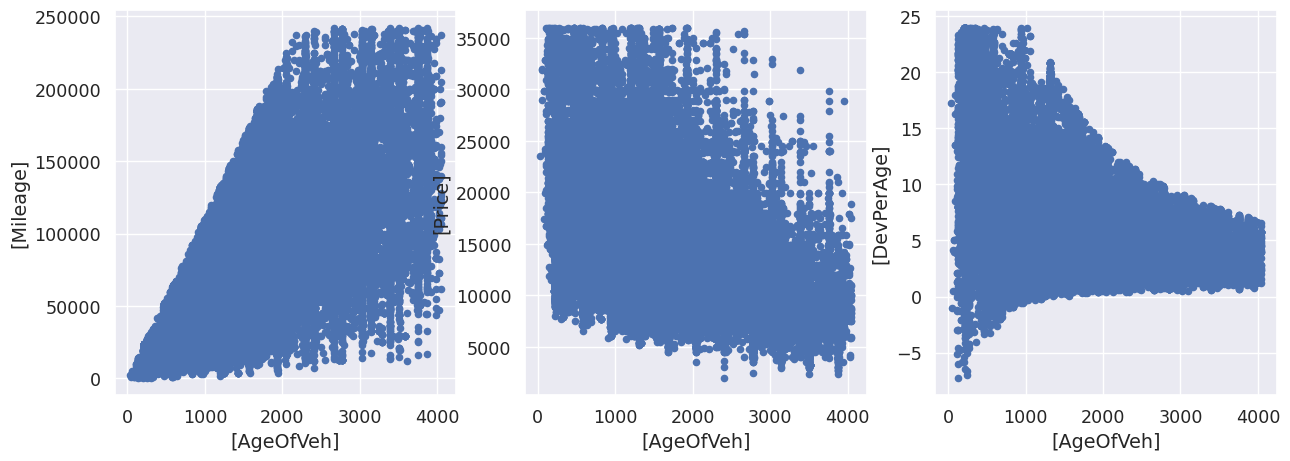

In [28]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sae.plot(x=['AgeOfVeh'], y=['Mileage'], kind='scatter', ax=axes[0])
sae.plot(x=['AgeOfVeh'], y=['Price'], kind='scatter', ax=axes[1])
sae.plot(x=['AgeOfVeh'], y=['DevPerAge'], kind='scatter', ax=axes[2])

In [29]:
sae.Mileage.describe()

count    104880.000000
mean      76984.835631
std       47874.106676
min         500.000000
25%       36531.750000
50%       71000.000000
75%      108889.500000
max      242149.000000
Name: Mileage, dtype: float64

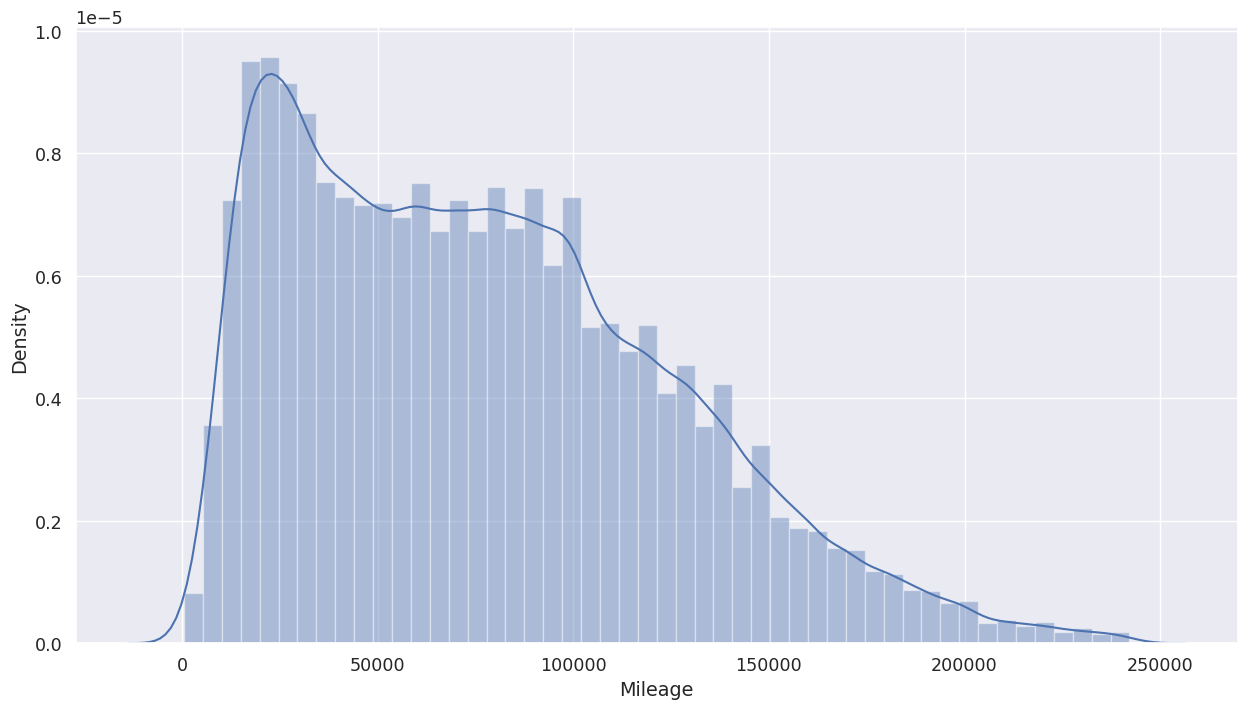

In [30]:
sns.distplot(sae.Mileage)

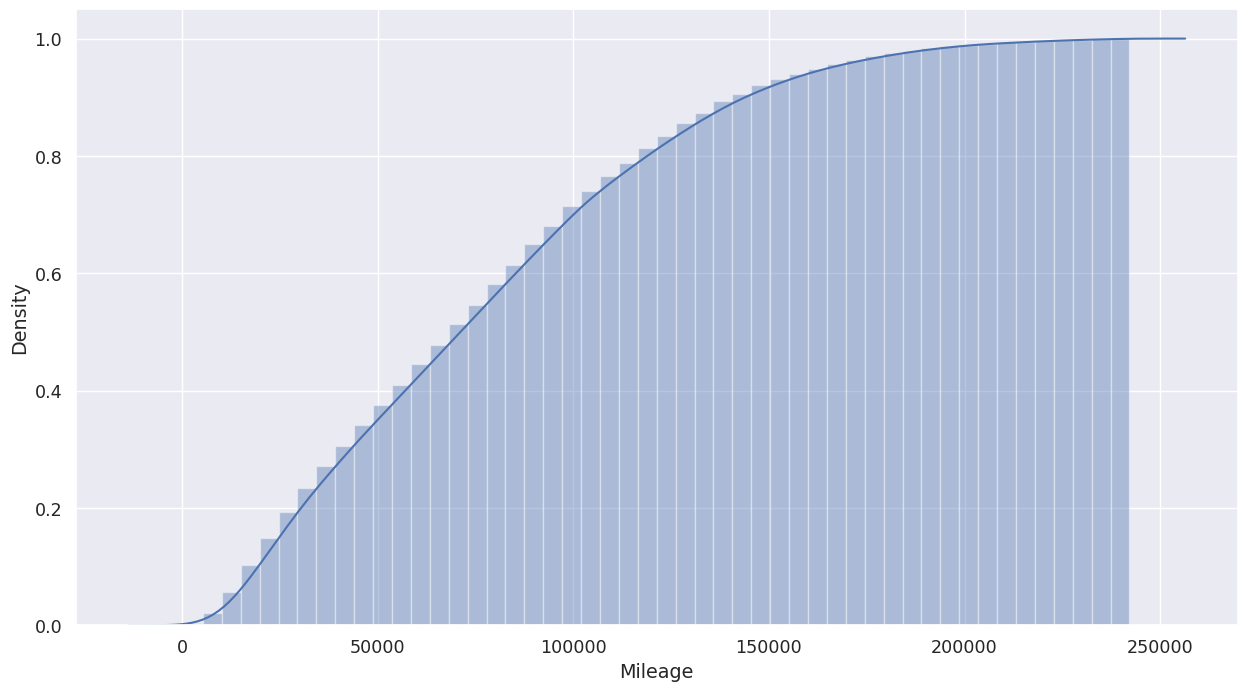

In [31]:
sns.distplot(sae.Mileage,
            hist_kws={'cumulative':True},
            kde_kws={'cumulative':True}); #kernel density estimation